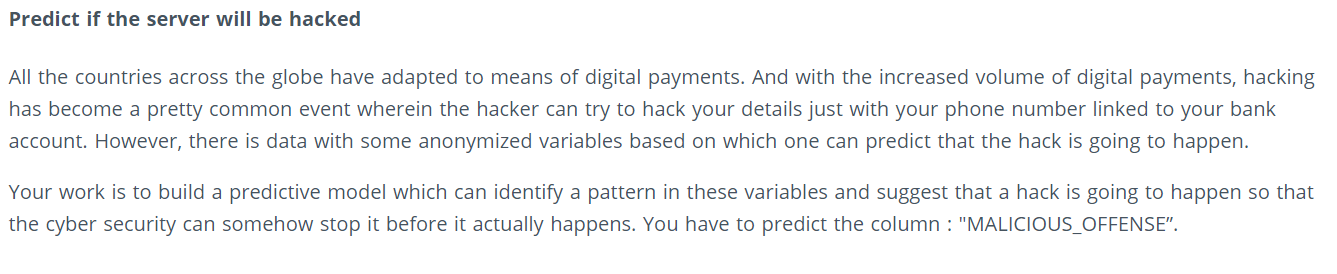

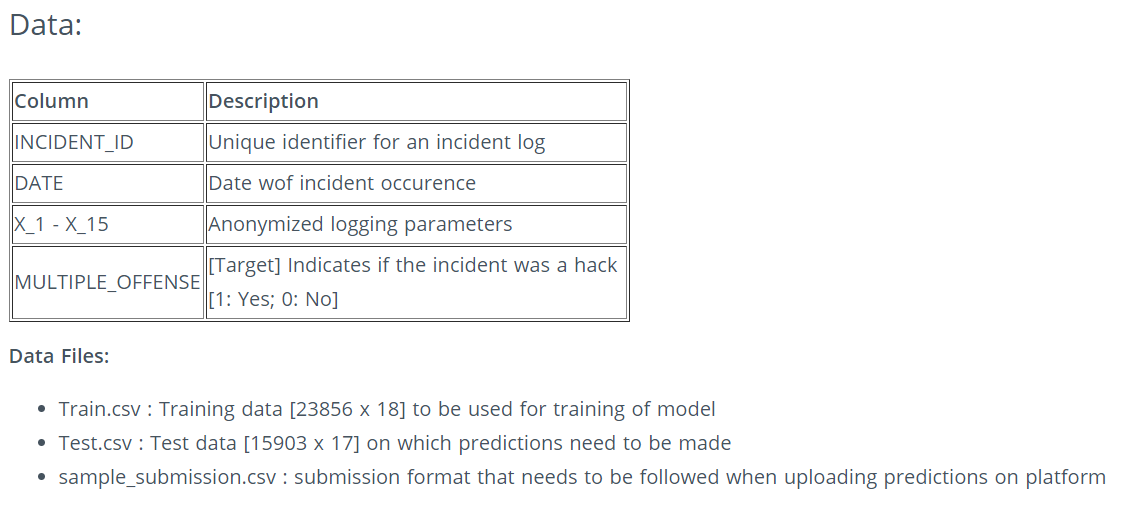

In [1]:
# Imports
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier

classes_dict={1:"yes",0:"No"}

In [2]:
from sklearn.metrics import recall_score
def eval_metric(actual,preds):
    return recall_score(actual,preds)
    
    

In [3]:
# EDA
train_df = pd.read_csv('Dataset/Train.csv')
test_df = pd.read_csv('Dataset/Test.csv')

In [4]:
train_df.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   INCIDENT_ID       23856 non-null  object 
 1   DATE              23856 non-null  object 
 2   X_1               23856 non-null  int64  
 3   X_2               23856 non-null  int64  
 4   X_3               23856 non-null  int64  
 5   X_4               23856 non-null  int64  
 6   X_5               23856 non-null  int64  
 7   X_6               23856 non-null  int64  
 8   X_7               23856 non-null  int64  
 9   X_8               23856 non-null  int64  
 10  X_9               23856 non-null  int64  
 11  X_10              23856 non-null  int64  
 12  X_11              23856 non-null  int64  
 13  X_12              23674 non-null  float64
 14  X_13              23856 non-null  int64  
 15  X_14              23856 non-null  int64  
 16  X_15              23856 non-null  int64 

In [30]:
# Creation of Submision Helper
def create_submission(classifier,name=None):
    sub = pd.DataFrame()
    sub['INCIDENT_ID'] = test_df['INCIDENT_ID']
    preds= classifier.predict(valid_x)
    print(eval_metric(valid_y,preds))
    preds = classifier.predict(test_df_processed)
    sub['MULTIPLE_OFFENSE'] = preds
    if name:
        classifier=name
    sub.to_csv('{}.csv'.format(classifier),index=False)
    print("Created Submission file {}.csv".format(classifier))



In [7]:
def preprocessing(df):
    df['X_12']= df['X_12'].fillna(-1.0)
    return df

# X_12 --> Contains Missing Values (Imputation Required : -1.0 (Chosen Value: Since all Examples are >=0) )
train_df[train_df.X_12>=0].shape



(23674, 18)

In [8]:
# Multiple Incidents exist in a single day
train_df['DATE'].value_counts()

# Would Time be a factor for a offense ? 
# TODO: Need to Explore Later 

12-SEP-01    22
13-SEP-01    20
17-SEP-01    17
15-SEP-01    15
11-SEP-01    15
             ..
05-JUN-02     1
27-JUN-92     1
08-JAN-16     1
16-AUG-94     1
08-FEB-05     1
Name: DATE, Length: 9121, dtype: int64

In [9]:
train_df['INCIDENT_ID'].nunique() # All the incidents are unique so no duplicates

23856

In [10]:
train_df.groupby(['DATE','INCIDENT_ID']).count()

X_1  X_2  X_3  X_4  X_5  X_6  X_7  X_8  X_9  X_10  \
DATE      INCIDENT_ID                                                      
01-APR-00 CR_64509       1    1    1    1    1    1    1    1    1     1   
          CR_64567       1    1    1    1    1    1    1    1    1     1   
          CR_64677       1    1    1    1    1    1    1    1    1     1   
          CR_64819       1    1    1    1    1    1    1    1    1     1   
          CR_67892       1    1    1    1    1    1    1    1    1     1   
...                    ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
31-OCT-98 CR_53849       1    1    1    1    1    1    1    1    1     1   
          CR_53864       1    1    1    1    1    1    1    1    1     1   
          CR_54167       1    1    1    1    1    1    1    1    1     1   
31-OCT-99 CR_61524       1    1    1    1    1    1    1    1    1     1   
          CR_61624       1    1    1    1    1    1    1    1    1     1   

                       X_11  X_12  X_13  X_14  X_15  MULTIPLE_OFFENSE  
DATE      INCIDENT_ID                                                  
01-APR-00 CR_64509        1     1     1     1     1                 1  
          CR_64567        1     1     1     1     1                 1  
          CR_64677        1     1     1     1     1                 1  
          CR_64819        1     1     1     1     1                 1  
          CR_67892        1     1     1     1     1                 1  
...                     ...   ...   ...   ...   ...               ...  
31-OCT-98 CR_53849        1     1     1     1     1                 1  
          CR_53864        1     1     1     1     1                 1  
          CR_54167        1     1     1     1     1                 1  
31-OCT-99 CR_61524        1     1     1     1     1                 1  
          CR_61624        1     1     1     1     1                 1  

[23856 rows x 16 columns]

In [11]:
train_df['MULTIPLE_OFFENSE'].value_counts(),train_df['MULTIPLE_OFFENSE'].value_counts(True)

# Heavy class imbalance: Similar to Credit card fraud prediction model.
# 1. Need to Oversample the minority class to balance the effect. : Helps in getting decent results
# 2. Leave it as such : Performed worse. Got only majority class right

(1    22788
 0     1068
 Name: MULTIPLE_OFFENSE, dtype: int64, 1    0.955231
 0    0.044769
 Name: MULTIPLE_OFFENSE, dtype: float64)

In [12]:
def OverSampleReplication(df,col=None,minority_class=None):
    ## Source: https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#oversample_the_minority_class
    ## Code modified as required to avoid redundancy and to handle pandas dataframe objects
    if col is None:
        raise Warning('Column value not passed')
    if col is None:
        raise Warning('minority_class value not passed')
    bool_train_labels = df[col]==minority_class
    pos_features = df[bool_train_labels]
    neg_features = df[~bool_train_labels]

    pos_labels = df[bool_train_labels]
    neg_labels = df[~bool_train_labels]
    ids = np.arange(len(pos_features))
    choices = np.random.choice(ids, len(neg_features))

    res_pos_features = pos_features.iloc[choices]
    resampled_features = pd.concat([res_pos_features, neg_features], axis=0)
    order = np.arange(len(resampled_features))
    np.random.shuffle(order)
    resampled_features = resampled_features.iloc[order]
   
    return resampled_features.drop([col],axis=1),resampled_features[col]

In [13]:
from sklearn.model_selection import train_test_split

train_df_preprocessed = train_df.drop(['DATE','INCIDENT_ID'],axis=1)
train_df_preprocessed['X_12']= train_df_preprocessed['X_12'].fillna(-1.0)

# Dataset Setup

test_df= pd.read_csv('Dataset/Test.csv')
ignore_cols =['DATE','INCIDENT_ID']
test_df_processed = test_df.drop(ignore_cols,axis=1)
test_df_processed = preprocessing(test_df_processed)


# Key Learning : 
# Always split the data into train and valid before oversampling them. 
# Helps avoids leakage of data from train to valid and gives accurate estimate of model performance


train_x, valid_x,train_y,valid_y = train_test_split(train_df_preprocessed.drop(['MULTIPLE_OFFENSE'],axis=1),train_df_preprocessed['MULTIPLE_OFFENSE'],stratify=train_df_preprocessed['MULTIPLE_OFFENSE'])
train_x.shape,train_y.shape, valid_x.shape,valid_y.shape


((17892, 15), (17892,), (5964, 15), (5964,))

In [14]:
df =pd.concat([train_x,train_y],axis=1)
train_x,train_y = OverSampleReplication(df,col='MULTIPLE_OFFENSE',minority_class=0)

df =pd.concat([valid_x,valid_y],axis=1)
valid_x,valid_y = OverSampleReplication(df,col='MULTIPLE_OFFENSE',minority_class=0)

train_x.shape,train_y.shape, valid_x.shape,valid_y.shape

((34182, 15), (34182,), (11394, 15), (11394,))

In [15]:
# Check if the distribution is matching 
train_y.value_counts(True),valid_y.value_counts(True) # Match Leaderboard Test Distribution 

(1    0.5
 0    0.5
 Name: MULTIPLE_OFFENSE, dtype: float64, 1    0.5
 0    0.5
 Name: MULTIPLE_OFFENSE, dtype: float64)

In [16]:
clf = DecisionTreeClassifier(max_depth=5,random_state=42).fit(train_x,train_y)

In [17]:
preds= clf.predict(valid_x)
print(eval_metric(valid_y,preds))

preds = clf.predict(test_df_processed)

0.9729682288923995


In [18]:
# On Valid submission: The local validaiton score closely follows the leader board score. 
# Hence the validation setup is correct

In [19]:
list(zip(train_x.columns,clf.feature_importances_))

[('X_1', 0.0),
 ('X_2', 0.0001169782893905642),
 ('X_3', 0.0),
 ('X_4', 0.0),
 ('X_5', 0.0),
 ('X_6', 0.0),
 ('X_7', 0.00032753921029357965),
 ('X_8', 0.0),
 ('X_9', 0.0),
 ('X_10', 0.6477439615716934),
 ('X_11', 0.16189641530601048),
 ('X_12', 0.0),
 ('X_13', 0.0),
 ('X_14', 0.0),
 ('X_15', 0.18991510562261196)]

In [20]:
# Features: X_10,X_11 and X_15 are the key features that help in classifying the incident to malicious or not


In [21]:
# Max depth parameter was identified using coarse grid  parameter search 

for i in range(3,15):
    clf = DecisionTreeClassifier(max_depth=i,random_state=42).fit(train_x,train_y)
    preds= clf.predict(valid_x)
    print("Max Depth :",i,"| Score: ",eval_metric(valid_y,preds))
    
    for feat,imp in list(zip(train_x.columns,clf.feature_importances_)):
        if imp > 1e-3:
            print(f"Feature:{feat} Importance : {imp} ")
    print('-'*100)
    
    
# I chose 5 because it is easier to interpret and the performance gain is minimal for higher depths and to avoid the risk of overfitting

Max Depth : 3 | Score:  0.9245216780761805
Feature:X_10 Importance : 0.7121349220018524 
Feature:X_11 Importance : 0.09183164840863177 
Feature:X_15 Importance : 0.19603342958951586 
----------------------------------------------------------------------------------------------------
Max Depth : 4 | Score:  0.9245216780761805
Feature:X_10 Importance : 0.6929194111448218 
Feature:X_11 Importance : 0.10487267992339717 
Feature:X_15 Importance : 0.2018575262340052 
----------------------------------------------------------------------------------------------------
Max Depth : 5 | Score:  0.9729682288923995
Feature:X_10 Importance : 0.6477439615716934 
Feature:X_11 Importance : 0.16189641530601048 
Feature:X_15 Importance : 0.18991510562261196 
----------------------------------------------------------------------------------------------------
Max Depth : 6 | Score:  0.9791118132350359
Feature:X_10 Importance : 0.6434539487952368 
Feature:X_11 Importance : 0.16142911202890967 
Feature:X_15 

In [22]:
create_submission(classifier=clf)

0.9991223450939091
Created Submission file DecisionTreeClassifier(max_depth=14, random_state=42).csv


# Miscellaneous Attempts and Failures

## 1. LogisticRegression

In [23]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)

In [24]:
clf.fit(train_x,train_y)
preds= clf.predict(valid_x)
print(eval_metric(valid_y,preds))

preds = clf.predict(test_df_processed) 
# Getting a ConvergenceWarning: Model might not be trained for enough iterations. 

0.8515007898894155


C:\Users\Gokkulnath\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [25]:
create_submission(clf)

0.8515007898894155
Created Submission file LogisticRegression(random_state=0).csv


## 2. KNeighborsClassifier


In [26]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()


In [27]:
clf.fit(train_x,train_y)
preds= clf.predict(valid_x)
print(eval_metric(valid_y,preds))
preds = clf.predict(test_df_processed) 
create_submission(clf)

0.9733192908548359
0.9733192908548359
Created Submission file KNeighborsClassifier().csv


## 3. MLPClassifier


In [28]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(128,32), solver='sgd',verbose=0, random_state=42)

In [31]:
clf.fit(train_x,train_y)
preds= clf.predict(valid_x)
print(eval_metric(valid_y,preds))
preds = clf.predict(test_df_processed) 
create_submission(clf,name='MLPClassifier')

0.934526944005617
0.934526944005617
Created Submission file MLPClassifier.csv


## 4. TF Keras based MLP

In [32]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

In [33]:
opt = Adam(learning_rate=1e-5)

In [34]:
model = Sequential([
        Dense(128,input_shape=(15,),activation='relu'),
        Dropout(0.25),
        Dense(1,activation='sigmoid')])
    
model.summary()
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.AUC()])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,177
Trainable params: 2,177
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.fit(train_x,train_y,epochs=100,batch_size=128,validation_data=(valid_x,valid_y),verbose=1) 

Epoch 1/100
268/268 [==============================] - 1s 5ms/step - loss: 8.1299 - accuracy: 0.4937 - recall: 0.4697 - auc: 0.4936 - val_loss: 1.8735 - val_accuracy: 0.5114 - val_recall: 0.5089 - val_auc: 0.5160
Epoch 2/100
268/268 [==============================] - 1s 4ms/step - loss: 7.8171 - accuracy: 0.5014 - recall: 0.4983 - auc: 0.5017 - val_loss: 1.6540 - val_accuracy: 0.5313 - val_recall: 0.6470 - val_auc: 0.5751
Epoch 3/100
268/268 [==============================] - 1s 5ms/step - loss: 7.3743 - accuracy: 0.5069 - recall: 0.5079 - auc: 0.5104 - val_loss: 1.5667 - val_accuracy: 0.5635 - val_recall: 0.6614 - val_auc: 0.6147
Epoch 4/100
268/268 [==============================] - 1s 4ms/step - loss: 6.9964 - accuracy: 0.5170 - recall: 0.5210 - auc: 0.5213 - val_loss: 1.5638 - val_accuracy: 0.5982 - val_recall: 0.6630 - val_auc: 0.6348
Epoch 5/100
268/268 [==============================] - 1s 5ms/step - loss: 6.6904 - accuracy: 0.5259 - recall: 0.5329 - auc: 0.5332 - val_loss: 1.56

268/268 [==============================] - 1s 5ms/step - loss: 2.4892 - accuracy: 0.6229 - recall: 0.6296 - auc: 0.6526 - val_loss: 1.0611 - val_accuracy: 0.7070 - val_recall: 0.7692 - val_auc: 0.7723
Epoch 40/100
268/268 [==============================] - 1s 5ms/step - loss: 2.3464 - accuracy: 0.6286 - recall: 0.6448 - auc: 0.6598 - val_loss: 1.0146 - val_accuracy: 0.7142 - val_recall: 0.7527 - val_auc: 0.7734
Epoch 41/100
268/268 [==============================] - 1s 4ms/step - loss: 2.3085 - accuracy: 0.6292 - recall: 0.6373 - auc: 0.6628 - val_loss: 1.0142 - val_accuracy: 0.7096 - val_recall: 0.7713 - val_auc: 0.7768
Epoch 42/100
268/268 [==============================] - 1s 5ms/step - loss: 2.2835 - accuracy: 0.6266 - recall: 0.6388 - auc: 0.6609 - val_loss: 0.9680 - val_accuracy: 0.7180 - val_recall: 0.7602 - val_auc: 0.7776
Epoch 43/100
268/268 [==============================] - 2s 6ms/step - loss: 2.1782 - accuracy: 0.6312 - recall: 0.6402 - auc: 0.6639 - val_loss: 0.9551 - val

268/268 [==============================] - 1s 4ms/step - loss: 0.8010 - accuracy: 0.6995 - recall: 0.6907 - auc: 0.7580 - val_loss: 0.5521 - val_accuracy: 0.7773 - val_recall: 0.7990 - val_auc: 0.8410
Epoch 78/100
268/268 [==============================] - 1s 4ms/step - loss: 0.7704 - accuracy: 0.7025 - recall: 0.6904 - auc: 0.7627 - val_loss: 0.5454 - val_accuracy: 0.7794 - val_recall: 0.8034 - val_auc: 0.8425
Epoch 79/100
268/268 [==============================] - 1s 5ms/step - loss: 0.7604 - accuracy: 0.7028 - recall: 0.6889 - auc: 0.7633 - val_loss: 0.5416 - val_accuracy: 0.7829 - val_recall: 0.8024 - val_auc: 0.8435
Epoch 80/100
268/268 [==============================] - 1s 5ms/step - loss: 0.7460 - accuracy: 0.7070 - recall: 0.6943 - auc: 0.7693 - val_loss: 0.5499 - val_accuracy: 0.7823 - val_recall: 0.8117 - val_auc: 0.8425
Epoch 81/100
268/268 [==============================] - 1s 4ms/step - loss: 0.7310 - accuracy: 0.7104 - recall: 0.6963 - auc: 0.7719 - val_loss: 0.5402 - val

In [36]:
# model.predict_classes(valid_x)
preds = (model.predict(valid_x) > 0.5).astype("int32").flatten()
print(eval_metric(valid_y,preds))

preds = (model.predict(test_df_processed) > 0.5).astype("int32").flatten()

sub = pd.DataFrame()
sub['INCIDENT_ID'] = test_df['INCIDENT_ID']
sub['MULTIPLE_OFFENSE'] = preds
sub.to_csv('keras_model.csv'.format(model),index=False)
print("Created Submission file Keras model.csv")

0.7995436194488327
Created Submission file Keras model.csv


# 5.SVM 

In [37]:
from sklearn.svm import SVC
clf = SVC(C=25,random_state=42) # Paramter C is the regularisation cost. Higher --> prevents overfitting

In [38]:
clf.fit(train_x,train_y)
preds= clf.predict(valid_x)
print(eval_metric(valid_y,preds))
preds = clf.predict(test_df_processed) 

0.9083728278041074


In [39]:
create_submission(clf)

0.9083728278041074
Created Submission file SVC(C=25, random_state=42).csv
